# Laborator 2

## Exercitii `ipywidgets`:


1. Generati o lista de 20 de perechi de valori $\{x_i, y_i\}_{i=0,19}$ in intervalul [0, 1], afisati aceste valori pe un grafic, impreuna cu o dreapta definita de o functie liniara $y=a*x+b$. Intr-un alt plot afisati, ca histograma, distanta dintre un punct de coordonate $(x_i, y_i)$ si punctul de intersectie a verticalei duse prin $x_i$ cu dreapta data. Dreapta trebuie sa fie controlabila din widgets, prin cei doi coeficienti. Constatati modificarea histogramei in functie de pozitia dreptei si calculati suma: $\sum_{i=0}^{19} (y_i - (a\cdot x_i + b))^2$, adica suma patratelor lungimilor segmentelor verzi de mai jos.
![linear regression](./images/linreg.png)
*Indicatii:*
    1. Pentru generare de valori distribuite uniform in intervalul [0, 1] puteti folosi functia [numy.random.uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html)
    1. Puteti opta sa returnati cele 20 de puncte sub forma `vector_x`, `vector_y`.
    
1. (Optional) Incarcati fisierul `yacht_hydrodynamics.csv` (adaptare dupa [Carbon Nanotubes Data Set](http://archive.ics.uci.edu/ml/datasets/Carbon+Nanotubes)). In functie de alegerile exprimate de un utilizator, afisati intr-un grafic 2D coloanele numerice alese (de exemplu, coloana 0 si coloana 2).
*Indicatii/optiuni*:
    1. Incarcarea de date se poate face cu numpy, functia [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). Specificati faptul ca se sare peste prima linie din fisier (header).
    1. Numarul de coloane din setul de date incarcat este 8 si se poate afla cu `data.shape[1]`.
    1. Puteti descarca fisierul direct de pe net, de exemplu cu functia `urlopen` din pachetul `urllib.request` sau cu pachetul [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
    1. Pentru cele doua alegeri puteti sa instantiati doua obiecte [Dropdown](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Dropdown) sau [Select](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Select).
    1. Daca in variabila `data` sunt datele incarcate, selectarea coloanei `i` se face cu `data[:, i]`.


## Rezolvari

### Exercitiul 1

In [1]:
import ipywidgets as widgets
# from IPython.display import display
from ipywidgets import interact, interact_manual
from numpy.random import uniform
import matplotlib.pyplot as plt

def get_points(n = 20):
    x = uniform(size=n)
    y = uniform(size=n)
    return x, y

def draw(a, b, x, y):
    plt.scatter(x, y)
    
x, y = get_points()
    
def draw_simple(a, b):
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.scatter(x, y)
    division_x = np.linspace(0, 1, 100)
    line_y = a * division_x + b
    plt.plot(division_x, line_y, color='yellow')
    plt.subplot(2, 1, 2)
    y_vertical = a * x + b
    distances = np.abs(y_vertical - y)
    plt.hist(distances)
    sum = np.sum(distances ** 2)
    print(f'MSE for a={a}, b={b} is {sum}')
    
    
# interact(draw_simple, a=(-10, 10, 0.5), b=(-10, 10, 0.5), continuous_update=False)

interact_manual(draw_simple, a=(-10, 10, 0.5), b=(-10, 10, 0.5), continuous_update=False)



C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

<function __main__.draw_simple(a, b)>

### Exercitiul 2

In [2]:
import numpy as np
from ipywidgets import Dropdown, interactive
from IPython.display import display

import matplotlib.pyplot as plt

data = np.loadtxt('carbon_nanotubes.csv', delimiter=',', skiprows=1)
# data.shape

n_cols = 8

In [3]:
def show_data(idx_a, idx_b):
    a_values = data[:, idx_a]
    b_values = data[:, idx_b]
    plt.figure(figsize=(20, 10))
    plt.scatter(a_values, b_values)
    


In [4]:
range_cols = list(range(n_cols))

interact(show_data, idx_a=range_cols, idx_b = range_cols)

interactive(children=(Dropdown(description='idx_a', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0), Dropdown(descr…

<function __main__.show_data(idx_a, idx_b)>

## Ciclari, siruri de caractere

Se recomanda ca urmatoarele exercitii sa le lucrati in Jupyter notebook/lab. Incercati parametrizarea functiilor cu ipywidgets.

1. (fizz-buzz test) Sa se scrie numerele de la 1 la n; pentru fiecare multiplu de 3 se va scrie in locul numarului 'Fizz', pentru multiplu al lui 5 se va scrie 'Buzz'; daca numarul este multiplu de 15 se va scrie in locul lui 'FizzBuzz'.
1. Sa se verifice [conjectura Collatz](https://en.wikipedia.org/wiki/Collatz_conjecture) pentru numerele intre 1 si 1000. Optional: reprezentati intr-un scatter plot numarul de pasi neceserai pentru stabilizare, precum [aici](https://en.wikipedia.org/wiki/Collatz_conjecture#/media/File:Collatz-stopping-time.svg).
1. Sa se creeze o functie care preia un numar n si returneaza un alt numar pe baza cifrelor lui n, astfel: se calculeaza numarul cifrelor pare din n (posibil sa fie si 0), numarul de cifre impare (poate fi si 0), suma lor si se formeaza numarul din acestea 3; daca exista vreun zero nesemnificativ, acesta se va ignora. Numarul obtinut se va supune aceleiasi transformari. Exemplu: 3->11->22->202->303->123->123->123... Verificati ca dupa un numar finit de transformari se ajunge la numarul 123; faceti aceste verificari pentru numerele din intevalul 1, 1000.
1. \* Se pleaca de la un numar intreg. Fiecare cifra a sa se scrie cu litere, in limba engleza (de exemplu 5->five). Claati numarul total de caractere rezultate, iar pentru numarul obtinut repetati procedura. Verificati pentru numerele de la 1 la n ca se obtine intr-un numar finit de pasi numarul 4. Exemplu: 123->onetwothree->11->oneone->6->six->3->three->5->five->4->four->4->four....
1. Este comportamentul de mai sus valabil si pentru transcriere in limba romana, eventual pentru alt cuvant?
1. Se pleaca de la un numar n; se scriu toti divizorii sai, inclusiv 1 si n; se aduna *cifrele* tuturor acestor divizori; pentru numarul obtinut se aplica acelasi procedeu. Verificati ca procesul se stabilizeaza in numarul 15. 
Exemplu: 20->1, 2, 4, 5, 10, 20 -> suma cifrelor: 15->1, 3, 5, 15-> suma cifrelor: 15...

## Rezolvari


### Exercitiul 1

In [5]:
n = 100

for i in range(1, n+1):
    if i % 15 == 0:
        print('FizzBuzz')
    elif i % 3 == 0:
        print('Fizz')
    elif i % 5 == 0:
        print('Buzz')
    else: print(i)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


### Exercitiul 2

In [6]:
def collatz(i, verbose = False):
    maxiters = 10000000
    for iters in range(maxiters):
        if verbose:
            print(i, end=';')
        if i == 1:
            return True, iters
        if i % 2 == 0:
            i = i // 2
        else:
            i = 3 * i + 1
    else:
        return False, maxiters
    
collatz(1213126, verbose=False)

(True, 204)

In [7]:
for i in range(1, 1001):
    result = collatz(i)
    print(f'{i}: {collatz(i)}')
    if not result[0]:
        print('Oops, found a counterexample')

1: (True, 0)
2: (True, 1)
3: (True, 7)
4: (True, 2)
5: (True, 5)
6: (True, 8)
7: (True, 16)
8: (True, 3)
9: (True, 19)
10: (True, 6)
11: (True, 14)
12: (True, 9)
13: (True, 9)
14: (True, 17)
15: (True, 17)
16: (True, 4)
17: (True, 12)
18: (True, 20)
19: (True, 20)
20: (True, 7)
21: (True, 7)
22: (True, 15)
23: (True, 15)
24: (True, 10)
25: (True, 23)
26: (True, 10)
27: (True, 111)
28: (True, 18)
29: (True, 18)
30: (True, 18)
31: (True, 106)
32: (True, 5)
33: (True, 26)
34: (True, 13)
35: (True, 13)
36: (True, 21)
37: (True, 21)
38: (True, 21)
39: (True, 34)
40: (True, 8)
41: (True, 109)
42: (True, 8)
43: (True, 29)
44: (True, 16)
45: (True, 16)
46: (True, 16)
47: (True, 104)
48: (True, 11)
49: (True, 24)
50: (True, 24)
51: (True, 24)
52: (True, 11)
53: (True, 11)
54: (True, 112)
55: (True, 112)
56: (True, 19)
57: (True, 32)
58: (True, 19)
59: (True, 32)
60: (True, 19)
61: (True, 19)
62: (True, 107)
63: (True, 107)
64: (True, 6)
65: (True, 27)
66: (True, 27)
67: (True, 27)
68: (True, 14

552: (True, 17)
553: (True, 136)
554: (True, 17)
555: (True, 30)
556: (True, 43)
557: (True, 43)
558: (True, 43)
559: (True, 87)
560: (True, 17)
561: (True, 43)
562: (True, 43)
563: (True, 43)
564: (True, 17)
565: (True, 17)
566: (True, 61)
567: (True, 61)
568: (True, 105)
569: (True, 56)
570: (True, 105)
571: (True, 30)
572: (True, 105)
573: (True, 105)
574: (True, 43)
575: (True, 43)
576: (True, 25)
577: (True, 30)
578: (True, 30)
579: (True, 30)
580: (True, 118)
581: (True, 118)
582: (True, 118)
583: (True, 30)
584: (True, 118)
585: (True, 56)
586: (True, 118)
587: (True, 118)
588: (True, 118)
589: (True, 118)
590: (True, 56)
591: (True, 56)
592: (True, 25)
593: (True, 74)
594: (True, 74)
595: (True, 74)
596: (True, 25)
597: (True, 25)
598: (True, 118)
599: (True, 118)
600: (True, 17)
601: (True, 56)
602: (True, 17)
603: (True, 69)
604: (True, 17)
605: (True, 17)
606: (True, 43)
607: (True, 43)
608: (True, 25)
609: (True, 131)
610: (True, 38)
611: (True, 38)
612: (True, 38)
613: (Tr

In [17]:
rng = range(1, 10000)

collatz_steps = [collatz(i)[1] for i in rng]

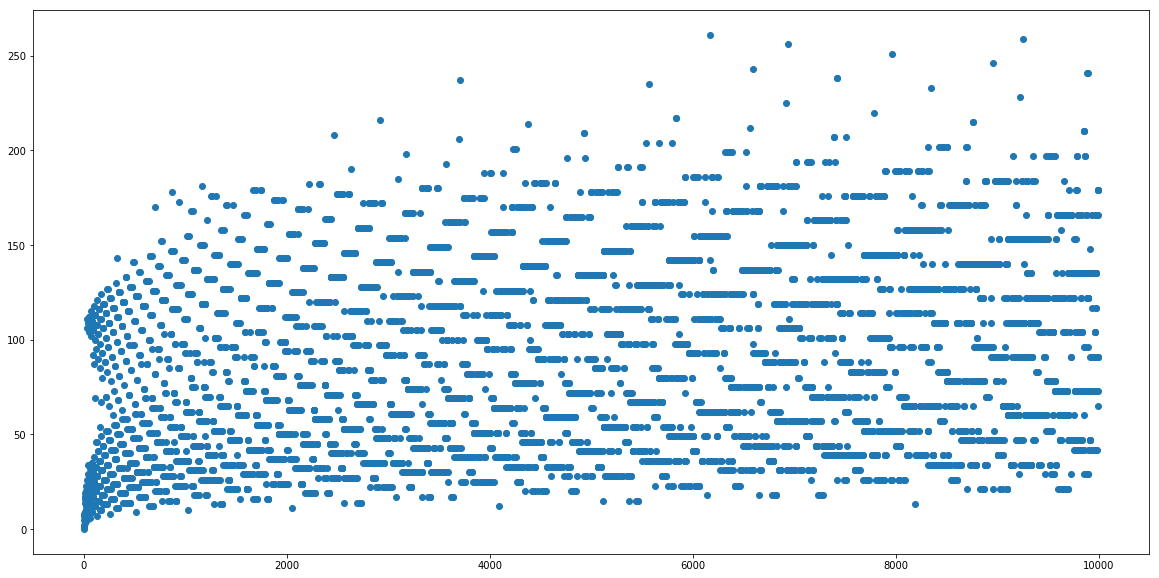

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(list(rng), collatz_steps)

### Exercitiul 3

In [8]:
def digits(n):
    maxiters = 1000000000
    for iter in range(0, maxiters):
        if n == 123:
            return True, iter
        str_n = str(n)
        count_odd = count_even = 0
        for digit in str_n:
            if int(digit) % 2 == 0:
                count_even += 1
            else:
                count_odd += 1
        n = int(str(count_even) + str(count_odd) + str(count_even + count_odd))
    else:
        return False, maxiters
    
for i in range(1, 1001):
    result = collatz(i)
    print(f'{i}: {digits(i)}')
    if not result[0]:
        print('Oops, found a counterexample')

1: (True, 5)
2: (True, 2)
3: (True, 5)
4: (True, 2)
5: (True, 5)
6: (True, 2)
7: (True, 5)
8: (True, 2)
9: (True, 5)
10: (True, 2)
11: (True, 4)
12: (True, 2)
13: (True, 4)
14: (True, 2)
15: (True, 4)
16: (True, 2)
17: (True, 4)
18: (True, 2)
19: (True, 4)
20: (True, 3)
21: (True, 2)
22: (True, 3)
23: (True, 2)
24: (True, 3)
25: (True, 2)
26: (True, 3)
27: (True, 2)
28: (True, 3)
29: (True, 2)
30: (True, 2)
31: (True, 4)
32: (True, 2)
33: (True, 4)
34: (True, 2)
35: (True, 4)
36: (True, 2)
37: (True, 4)
38: (True, 2)
39: (True, 4)
40: (True, 3)
41: (True, 2)
42: (True, 3)
43: (True, 2)
44: (True, 3)
45: (True, 2)
46: (True, 3)
47: (True, 2)
48: (True, 3)
49: (True, 2)
50: (True, 2)
51: (True, 4)
52: (True, 2)
53: (True, 4)
54: (True, 2)
55: (True, 4)
56: (True, 2)
57: (True, 4)
58: (True, 2)
59: (True, 4)
60: (True, 3)
61: (True, 2)
62: (True, 3)
63: (True, 2)
64: (True, 3)
65: (True, 2)
66: (True, 3)
67: (True, 2)
68: (True, 3)
69: (True, 2)
70: (True, 2)
71: (True, 4)
72: (True, 2)
7

614: (True, 2)
615: (True, 1)
616: (True, 2)
617: (True, 1)
618: (True, 2)
619: (True, 1)
620: (True, 2)
621: (True, 2)
622: (True, 2)
623: (True, 2)
624: (True, 2)
625: (True, 2)
626: (True, 2)
627: (True, 2)
628: (True, 2)
629: (True, 2)
630: (True, 2)
631: (True, 1)
632: (True, 2)
633: (True, 1)
634: (True, 2)
635: (True, 1)
636: (True, 2)
637: (True, 1)
638: (True, 2)
639: (True, 1)
640: (True, 2)
641: (True, 2)
642: (True, 2)
643: (True, 2)
644: (True, 2)
645: (True, 2)
646: (True, 2)
647: (True, 2)
648: (True, 2)
649: (True, 2)
650: (True, 2)
651: (True, 1)
652: (True, 2)
653: (True, 1)
654: (True, 2)
655: (True, 1)
656: (True, 2)
657: (True, 1)
658: (True, 2)
659: (True, 1)
660: (True, 2)
661: (True, 2)
662: (True, 2)
663: (True, 2)
664: (True, 2)
665: (True, 2)
666: (True, 2)
667: (True, 2)
668: (True, 2)
669: (True, 2)
670: (True, 2)
671: (True, 1)
672: (True, 2)
673: (True, 1)
674: (True, 2)
675: (True, 1)
676: (True, 2)
677: (True, 1)
678: (True, 2)
679: (True, 1)
680: (True

### Exercitiul 4

In [9]:
words = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

def digits_words(n):
    maxiters = 1000000
    for iters in range(maxiters):
        if n == 4:
            return True, iters
        str_new = "".join([words[int(digit)] for digit in str(n)])
        n = len(str_new)
    else:
        return False, maxiters
    
for i in range(1, 1001):
    result = digits_words(i)
    print(f'i={i}, {result}')
    if not result[0]:
        print('oops, counterexample found')

i=1, (True, 3)
i=2, (True, 3)
i=3, (True, 2)
i=4, (True, 0)
i=5, (True, 1)
i=6, (True, 3)
i=7, (True, 2)
i=8, (True, 2)
i=9, (True, 1)
i=10, (True, 3)
i=11, (True, 4)
i=12, (True, 4)
i=13, (True, 3)
i=14, (True, 3)
i=15, (True, 3)
i=16, (True, 4)
i=17, (True, 3)
i=18, (True, 3)
i=19, (True, 3)
i=20, (True, 3)
i=21, (True, 4)
i=22, (True, 4)
i=23, (True, 3)
i=24, (True, 3)
i=25, (True, 3)
i=26, (True, 4)
i=27, (True, 3)
i=28, (True, 3)
i=29, (True, 3)
i=30, (True, 2)
i=31, (True, 3)
i=32, (True, 3)
i=33, (True, 4)
i=34, (True, 2)
i=35, (True, 2)
i=36, (True, 3)
i=37, (True, 4)
i=38, (True, 4)
i=39, (True, 2)
i=40, (True, 3)
i=41, (True, 3)
i=42, (True, 3)
i=43, (True, 2)
i=44, (True, 3)
i=45, (True, 3)
i=46, (True, 3)
i=47, (True, 2)
i=48, (True, 2)
i=49, (True, 3)
i=50, (True, 3)
i=51, (True, 3)
i=52, (True, 3)
i=53, (True, 2)
i=54, (True, 3)
i=55, (True, 3)
i=56, (True, 3)
i=57, (True, 2)
i=58, (True, 2)
i=59, (True, 3)
i=60, (True, 3)
i=61, (True, 4)
i=62, (True, 4)
i=63, (True, 3)
i

i=579, (True, 4)
i=580, (True, 4)
i=581, (True, 5)
i=582, (True, 5)
i=583, (True, 4)
i=584, (True, 4)
i=585, (True, 4)
i=586, (True, 5)
i=587, (True, 4)
i=588, (True, 4)
i=589, (True, 4)
i=590, (True, 5)
i=591, (True, 5)
i=592, (True, 5)
i=593, (True, 4)
i=594, (True, 5)
i=595, (True, 5)
i=596, (True, 5)
i=597, (True, 4)
i=598, (True, 4)
i=599, (True, 5)
i=600, (True, 5)
i=601, (True, 4)
i=602, (True, 4)
i=603, (True, 5)
i=604, (True, 5)
i=605, (True, 5)
i=606, (True, 4)
i=607, (True, 5)
i=608, (True, 5)
i=609, (True, 5)
i=610, (True, 4)
i=611, (True, 2)
i=612, (True, 2)
i=613, (True, 5)
i=614, (True, 4)
i=615, (True, 4)
i=616, (True, 2)
i=617, (True, 5)
i=618, (True, 5)
i=619, (True, 4)
i=620, (True, 4)
i=621, (True, 2)
i=622, (True, 2)
i=623, (True, 5)
i=624, (True, 4)
i=625, (True, 4)
i=626, (True, 2)
i=627, (True, 5)
i=628, (True, 5)
i=629, (True, 4)
i=630, (True, 5)
i=631, (True, 5)
i=632, (True, 5)
i=633, (True, 4)
i=634, (True, 5)
i=635, (True, 5)
i=636, (True, 5)
i=637, (True, 

### Exercitiul 5

In [10]:
cuvinte = ['zero', 'unu', 'doi', 'trei', 'patru', 'cinci', 'sase', 'sapte', 'opt', 'noua']

def digits_words_romanian(n, verbose=False):
    maxiters = 1000000
    for iters in range(maxiters):
        if verbose:
            print(n)
        if n == 5:
            return True, iters
        str_new = "".join([cuvinte[int(digit)] for digit in str(n)])
        n = len(str_new)
    else:
        return False, maxiters
    
for i in range(1, 1001):
    result = digits_words_romanian(i)
    print(f'i={i}, {result}')
    if not result[0]:
        print('oops, counterexample found')


i=1, (True, 3)
i=2, (True, 3)
i=3, (True, 2)
i=4, (True, 1)
i=5, (True, 0)
i=6, (True, 2)
i=7, (True, 1)
i=8, (True, 3)
i=9, (True, 2)
i=10, (True, 2)
i=11, (True, 3)
i=12, (True, 3)
i=13, (True, 2)
i=14, (True, 4)
i=15, (True, 4)
i=16, (True, 2)
i=17, (True, 4)
i=18, (True, 3)
i=19, (True, 2)
i=20, (True, 2)
i=21, (True, 3)
i=22, (True, 3)
i=23, (True, 2)
i=24, (True, 4)
i=25, (True, 4)
i=26, (True, 2)
i=27, (True, 4)
i=28, (True, 3)
i=29, (True, 2)
i=30, (True, 4)
i=31, (True, 2)
i=32, (True, 2)
i=33, (True, 4)
i=34, (True, 3)
i=35, (True, 3)
i=36, (True, 4)
i=37, (True, 3)
i=38, (True, 2)
i=39, (True, 4)
i=40, (True, 3)
i=41, (True, 4)
i=42, (True, 4)
i=43, (True, 3)
i=44, (True, 3)
i=45, (True, 3)
i=46, (True, 3)
i=47, (True, 3)
i=48, (True, 4)
i=49, (True, 3)
i=50, (True, 3)
i=51, (True, 4)
i=52, (True, 4)
i=53, (True, 3)
i=54, (True, 3)
i=55, (True, 3)
i=56, (True, 3)
i=57, (True, 3)
i=58, (True, 4)
i=59, (True, 3)
i=60, (True, 4)
i=61, (True, 2)
i=62, (True, 2)
i=63, (True, 4)
i

i=505, (True, 5)
i=506, (True, 3)
i=507, (True, 5)
i=508, (True, 4)
i=509, (True, 3)
i=510, (True, 4)
i=511, (True, 4)
i=512, (True, 4)
i=513, (True, 4)
i=514, (True, 3)
i=515, (True, 3)
i=516, (True, 4)
i=517, (True, 3)
i=518, (True, 4)
i=519, (True, 4)
i=520, (True, 4)
i=521, (True, 4)
i=522, (True, 4)
i=523, (True, 4)
i=524, (True, 3)
i=525, (True, 3)
i=526, (True, 4)
i=527, (True, 3)
i=528, (True, 4)
i=529, (True, 4)
i=530, (True, 3)
i=531, (True, 4)
i=532, (True, 4)
i=533, (True, 3)
i=534, (True, 5)
i=535, (True, 5)
i=536, (True, 3)
i=537, (True, 5)
i=538, (True, 4)
i=539, (True, 3)
i=540, (True, 5)
i=541, (True, 3)
i=542, (True, 3)
i=543, (True, 5)
i=544, (True, 5)
i=545, (True, 5)
i=546, (True, 5)
i=547, (True, 5)
i=548, (True, 3)
i=549, (True, 5)
i=550, (True, 5)
i=551, (True, 3)
i=552, (True, 3)
i=553, (True, 5)
i=554, (True, 5)
i=555, (True, 5)
i=556, (True, 5)
i=557, (True, 5)
i=558, (True, 3)
i=559, (True, 5)
i=560, (True, 3)
i=561, (True, 4)
i=562, (True, 4)
i=563, (True, 

i=994, (True, 3)
i=995, (True, 3)
i=996, (True, 4)
i=997, (True, 3)
i=998, (True, 4)
i=999, (True, 4)
i=1000, (True, 5)


### Exercitiul 6

In [11]:
# Cam la fel